In [18]:
# Load CIFAR-10 data set
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

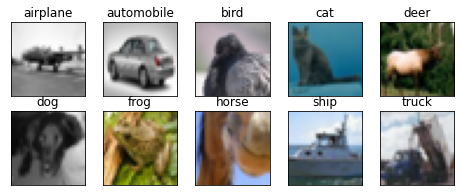

In [19]:
# Show examples from each class
import numpy as np
import matplotlib.pyplot as plt

num_classes = len(np.unique(y_train))
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    rnd_img = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[rnd_img,::], (0, 1, 2))
    plt.imshow(im)
plt.show()

In [20]:
# Data pre-processing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [21]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1,step=len(model_history.history['accuracy'])/10))
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1,step=len(model_history.history['loss'])/10))
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import experimental

def build_model_v1():
    model = Sequential([experimental.preprocessing.Rescaling(1./255, input_shape=(32, 32, 3)),
    experimental.preprocessing.RandomRotation(0.2),
    experimental.preprocessing.RandomZoom(.2),
    experimental.preprocessing.RandomFlip("horizontal")])

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def build_model_v2():
    model = Sequential([experimental.preprocessing.Rescaling(1./255, input_shape=(32, 32, 3)),
    experimental.preprocessing.RandomRotation(0.2),
    experimental.preprocessing.RandomZoom(.2),
    experimental.preprocessing.RandomFlip("horizontal")])

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

def build_model_v3():
    model = Sequential([experimental.preprocessing.Rescaling(1./255, input_shape=(32, 32, 3)),
    experimental.preprocessing.RandomRotation(0.2),
    experimental.preprocessing.RandomZoom(.2),
    experimental.preprocessing.RandomFlip("horizontal")])

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(BatchNormalization())
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Dropout(.3))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

In [23]:
# Feed forward dense model
# Here it is not allowed to use convolutional layers
# You may use any regularizacion (see class slides)

model = build_model_v1()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
random_rotation_2 (RandomRot (None, 32, 32, 3)         0         
_________________________________________________________________
random_zoom_2 (RandomZoom)   (None, 32, 32, 3)         0         
_________________________________________________________________
random_flip_2 (RandomFlip)   (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               393344    
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)              

Epoch 1/40
391/391 [==============================] - 7s 14ms/step - loss: 2.1154 - accuracy: 0.2443 - val_loss: 2.1521 - val_accuracy: 0.1885
Epoch 2/40
391/391 [==============================] - 5s 13ms/step - loss: 1.8532 - accuracy: 0.3344 - val_loss: 1.7358 - val_accuracy: 0.3888
Epoch 3/40
391/391 [==============================] - 5s 13ms/step - loss: 1.7953 - accuracy: 0.3584 - val_loss: 1.7735 - val_accuracy: 0.3711
Epoch 4/40
391/391 [==============================] - 5s 13ms/step - loss: 1.7491 - accuracy: 0.3759 - val_loss: 1.7203 - val_accuracy: 0.3855
Epoch 5/40
391/391 [==============================] - 5s 13ms/step - loss: 1.7359 - accuracy: 0.3824 - val_loss: 1.6707 - val_accuracy: 0.4165
Epoch 6/40
391/391 [==============================] - 6s 14ms/step - loss: 1.7079 - accuracy: 0.3897 - val_loss: 1.7274 - val_accuracy: 0.3846
Epoch 7/40
391/391 [==============================] - 6s 14ms/step - loss: 1.6876 - accuracy: 0.3929 - val_loss: 1.7993 - val_accuracy: 0.3591

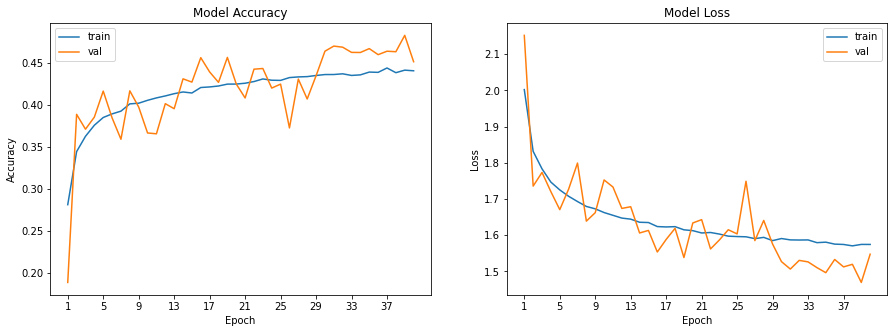

Training MLP took 207.5480010509491 seconds


In [24]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

In [25]:
# Feed forward dense model
# Here it is not allowed to use convolutional layers
# You may use any regularizacion (see class slides)

model = build_model_v2()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
random_rotation_3 (RandomRot (None, 32, 32, 3)         0         
_________________________________________________________________
random_zoom_3 (RandomZoom)   (None, 32, 32, 3)         0         
_________________________________________________________________
random_flip_3 (RandomFlip)   (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               393344    
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)              

Epoch 1/40
391/391 [==============================] - 7s 14ms/step - loss: 2.3118 - accuracy: 0.1580 - val_loss: 2.2178 - val_accuracy: 0.1436
Epoch 2/40
391/391 [==============================] - 5s 13ms/step - loss: 2.0546 - accuracy: 0.2403 - val_loss: 1.8986 - val_accuracy: 0.3254
Epoch 3/40
391/391 [==============================] - 5s 13ms/step - loss: 1.9998 - accuracy: 0.2625 - val_loss: 1.9708 - val_accuracy: 0.3085
Epoch 4/40
391/391 [==============================] - 5s 14ms/step - loss: 1.9623 - accuracy: 0.2775 - val_loss: 1.8062 - val_accuracy: 0.3693
Epoch 5/40
391/391 [==============================] - 5s 13ms/step - loss: 1.9381 - accuracy: 0.2888 - val_loss: 1.8403 - val_accuracy: 0.3398
Epoch 6/40
391/391 [==============================] - 5s 13ms/step - loss: 1.9114 - accuracy: 0.3049 - val_loss: 1.7712 - val_accuracy: 0.3761
Epoch 7/40
391/391 [==============================] - 5s 13ms/step - loss: 1.9062 - accuracy: 0.3099 - val_loss: 1.7506 - val_accuracy: 0.3817

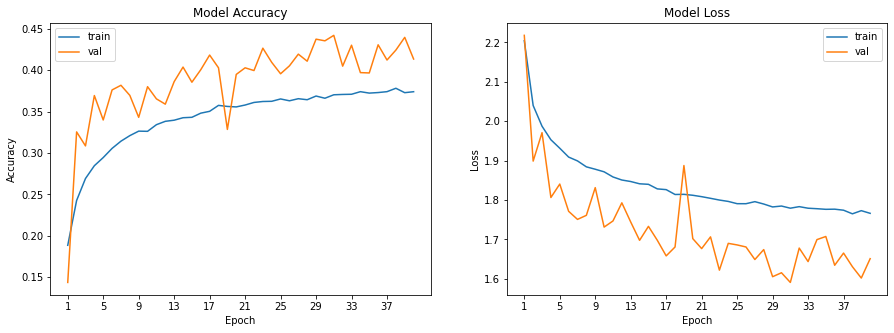

Training MLP took 217.16677594184875 seconds


In [26]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

In [27]:
# Feed forward dense model
# Here it is not allowed to use convolutional layers
# You may use any regularizacion (see class slides)

model = build_model_v3()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
random_rotation_4 (RandomRot (None, 32, 32, 3)         0         
_________________________________________________________________
random_zoom_4 (RandomZoom)   (None, 32, 32, 3)         0         
_________________________________________________________________
random_flip_4 (RandomFlip)   (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
batch_normalization_8 (Batch (None, 1024)             

Epoch 1/40
391/391 [==============================] - 15s 34ms/step - loss: 2.2169 - accuracy: 0.2134 - val_loss: 2.2151 - val_accuracy: 0.1700
Epoch 2/40
391/391 [==============================] - 14s 36ms/step - loss: 1.8905 - accuracy: 0.3180 - val_loss: 1.8103 - val_accuracy: 0.3519
Epoch 3/40
391/391 [==============================] - 13s 33ms/step - loss: 1.8103 - accuracy: 0.3540 - val_loss: 1.7197 - val_accuracy: 0.3868
Epoch 4/40
391/391 [==============================] - 13s 33ms/step - loss: 1.7610 - accuracy: 0.3742 - val_loss: 1.7330 - val_accuracy: 0.3842
Epoch 5/40
391/391 [==============================] - 13s 33ms/step - loss: 1.7353 - accuracy: 0.3804 - val_loss: 1.8253 - val_accuracy: 0.3469
Epoch 6/40
391/391 [==============================] - 14s 36ms/step - loss: 1.7149 - accuracy: 0.3936 - val_loss: 1.6790 - val_accuracy: 0.4061
Epoch 7/40
391/391 [==============================] - 14s 36ms/step - loss: 1.6922 - accuracy: 0.3979 - val_loss: 1.7230 - val_accuracy:

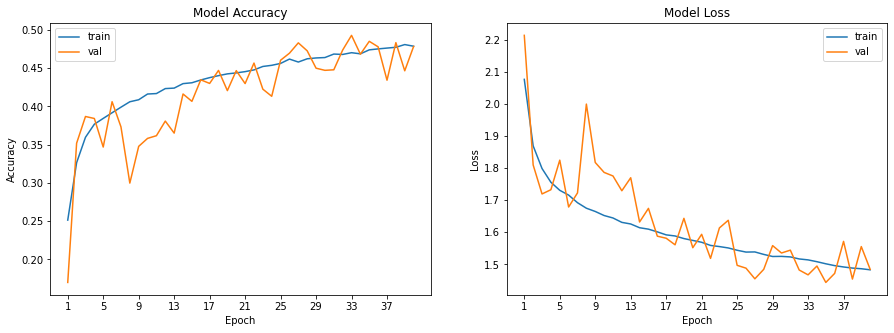

Training MLP took 550.9253656864166 seconds


In [28]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

Definición de una red convolucional multicapa

In [32]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Input, Dropout, BatchNormalization, Conv2D, MaxPooling2D

def create_block(block_input, n_filtros):
    x = block_input
    for i in range(2):
        x = Conv2D(n_filtros, kernel_size=(3,3), padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
    return x

def build_conv(include_dropout = True): # De https://www.kaggle.com/mahtabshaan/autoencoder-as-feature-extractor-cifar10
    net_input = Input((32,32,3))

    block1 = create_block(net_input, 32)
    x = MaxPooling2D(pool_size=(2, 2))(block1)
    if include_dropout:
        x = Dropout(0.2)(x)

    block2 = create_block(x, 64)
    x = MaxPooling2D(pool_size=(2, 2))(block2)
    if include_dropout:
        x = Dropout(0.3)(x)

    block3 = create_block(x, 128)
    x = MaxPooling2D(pool_size=(2, 2))(block3)
    if include_dropout:
        x = Dropout(0.3)(block3)

    x = Flatten()(x)
    output = Dense(10, activation='softmax')(x)
    return Model(net_input, output)


In [33]:
# Convolutional Neural Network (CNN)
# Here you are allowed to use convolutional layers
# You may use also any regularizacion (see class slides)

import keras.backend as K

model = build_conv()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128   

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 223s 4ms/step - loss: 1.7762 - accuracy: 0.4403 - val_loss: 3.7116 - val_accuracy: 0.1002
Epoch 2/20
50000/50000 [==============================] - 222s 4ms/step - loss: 1.2260 - accuracy: 0.5922 - val_loss: 3.8440 - val_accuracy: 0.1302
Epoch 3/20
50000/50000 [==============================] - 228s 5ms/step - loss: 0.9921 - accuracy: 0.6622 - val_loss: 3.1727 - val_accuracy: 0.2385
Epoch 4/20
50000/50000 [==============================] - 227s 5ms/step - loss: 0.8659 - accuracy: 0.7010 - val_loss: 2.4006 - val_accuracy: 0.3106
Epoch 5/20
50000/50000 [==============================] - 227s 5ms/step - loss: 0.7628 - accuracy: 0.7375 - val_loss: 1.3420 - val_accuracy: 0.5520
Epoch 6/20
50000/50000 [==============================] - 229s 5ms/step - loss: 0.7001 - accuracy: 0.7574 - val_loss: 0.8618 - val_accuracy: 0.7116
Epoch 7/20
50000/50000 [==============================] - 256s

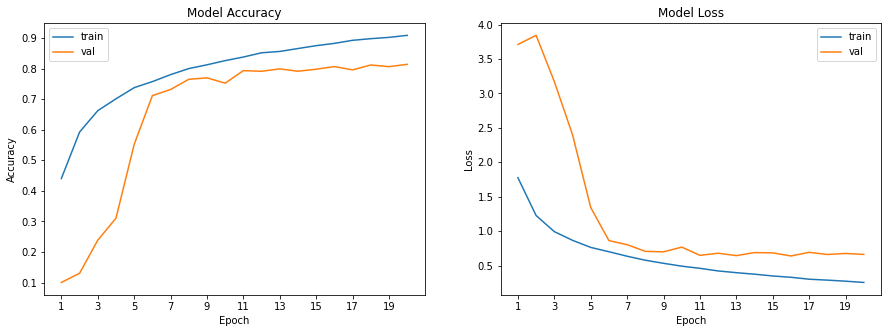

Training MLP took 4542.738701581955 seconds


In [14]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=512, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")